In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
rmse = {
    experiment: xr.open_dataset(f"/pscratch/sd/t/timothys/nested-eagle/phase-1/loss-scaling/{experiment}/validation.rmse.nc", decode_timedelta=True)
    for experiment in ["ones", "default", "gmean-residual-stdev"]
}

In [4]:
mae = {
    experiment: xr.open_dataset(f"/pscratch/sd/t/timothys/nested-eagle/phase-1/loss-scaling/{experiment}/validation.mae.nc", decode_timedelta=True)
    for experiment in ["ones", "default", "gmean-residual-stdev"]
}

In [16]:
rmse["ones"].data_vars

Data variables:
    geopotential             (lead_time, level) float64 4kB ...
    specific_humidity        (lead_time, level) float64 4kB ...
    temperature              (lead_time, level) float64 4kB ...
    u_component_of_wind      (lead_time, level) float64 4kB ...
    v_component_of_wind      (lead_time, level) float64 4kB ...
    vertical_velocity        (lead_time, level) float64 4kB ...
    10m_u_component_of_wind  (lead_time) float64 328B ...
    10m_v_component_of_wind  (lead_time) float64 328B ...
    2m_temperature           (lead_time) float64 328B ...
    cos_solar_zenith_angle   (lead_time) float64 328B ...
    surface_pressure         (lead_time) float64 328B ...
    total_column_water       (lead_time) float64 328B ...
    total_precipitation_6hr  (lead_time) float64 328B ...

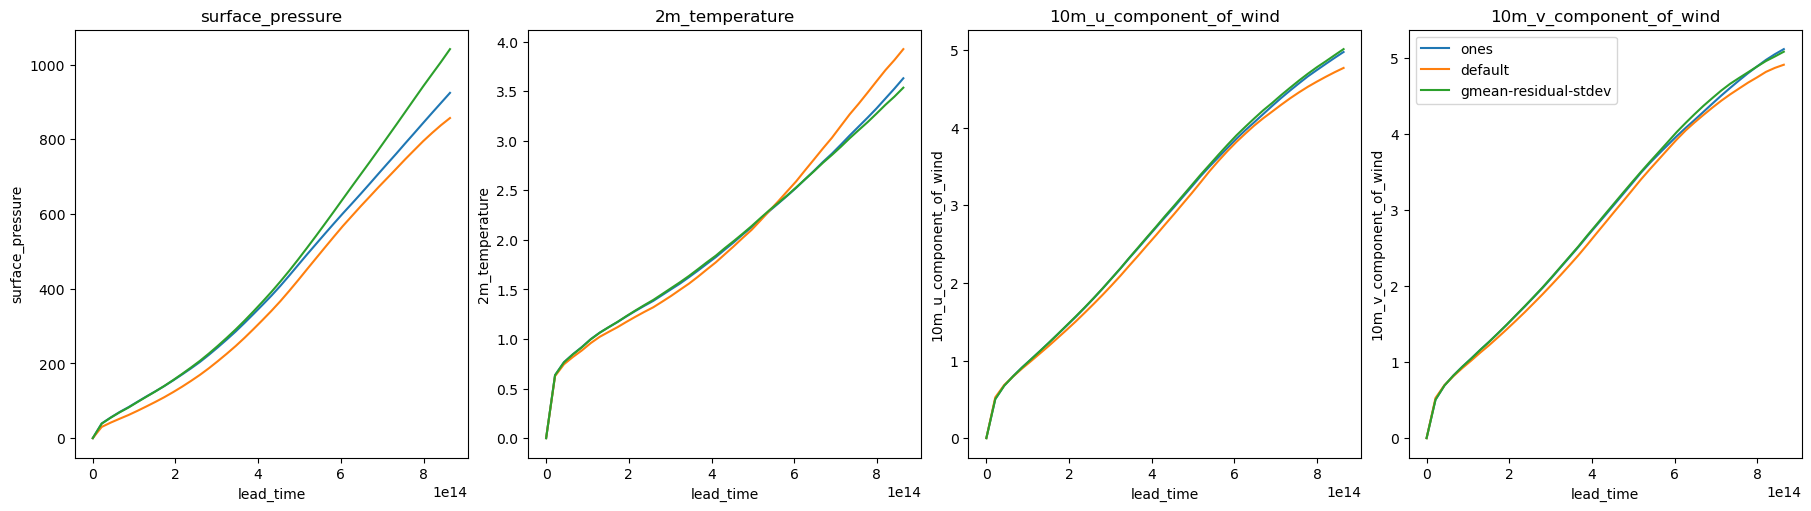

In [14]:
fig, axs = plt.subplots(1,4, figsize=(18, 5), constrained_layout=True)

for varname, ax in zip(
    ["surface_pressure", "2m_temperature", "10m_u_component_of_wind", "10m_v_component_of_wind"],
    axs,
):
    for experiment, xds in rmse.items():
        xds[varname].plot(ax=ax, label=experiment)
    ax.set(title=varname)

ax.legend()

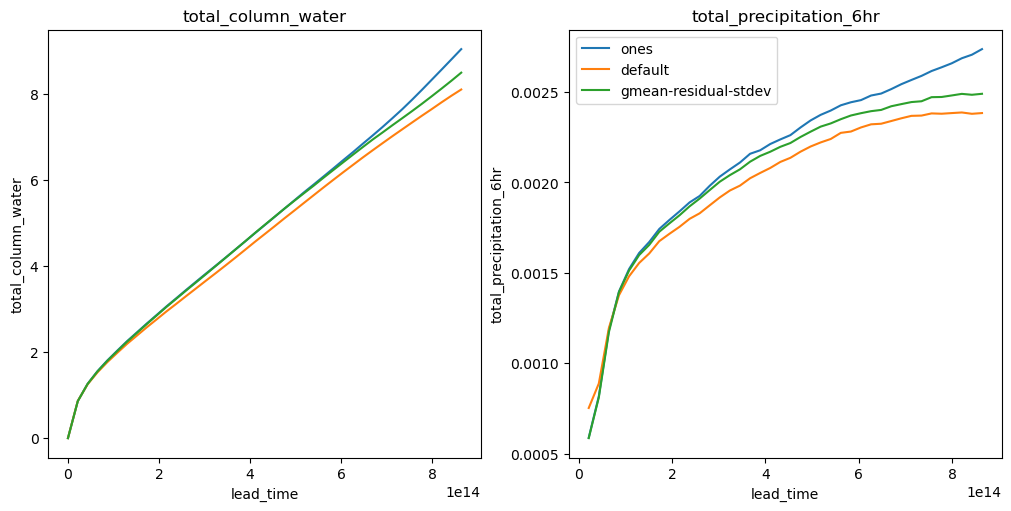

In [17]:
fig, axs = plt.subplots(1,2, figsize=(10, 5), constrained_layout=True)

for varname, ax in zip(
    ["total_column_water", "total_precipitation_6hr"],
    axs,
):
    for experiment, xds in rmse.items():
        xds[varname].plot(ax=ax, label=experiment)
    ax.set(title=varname)

ax.legend()

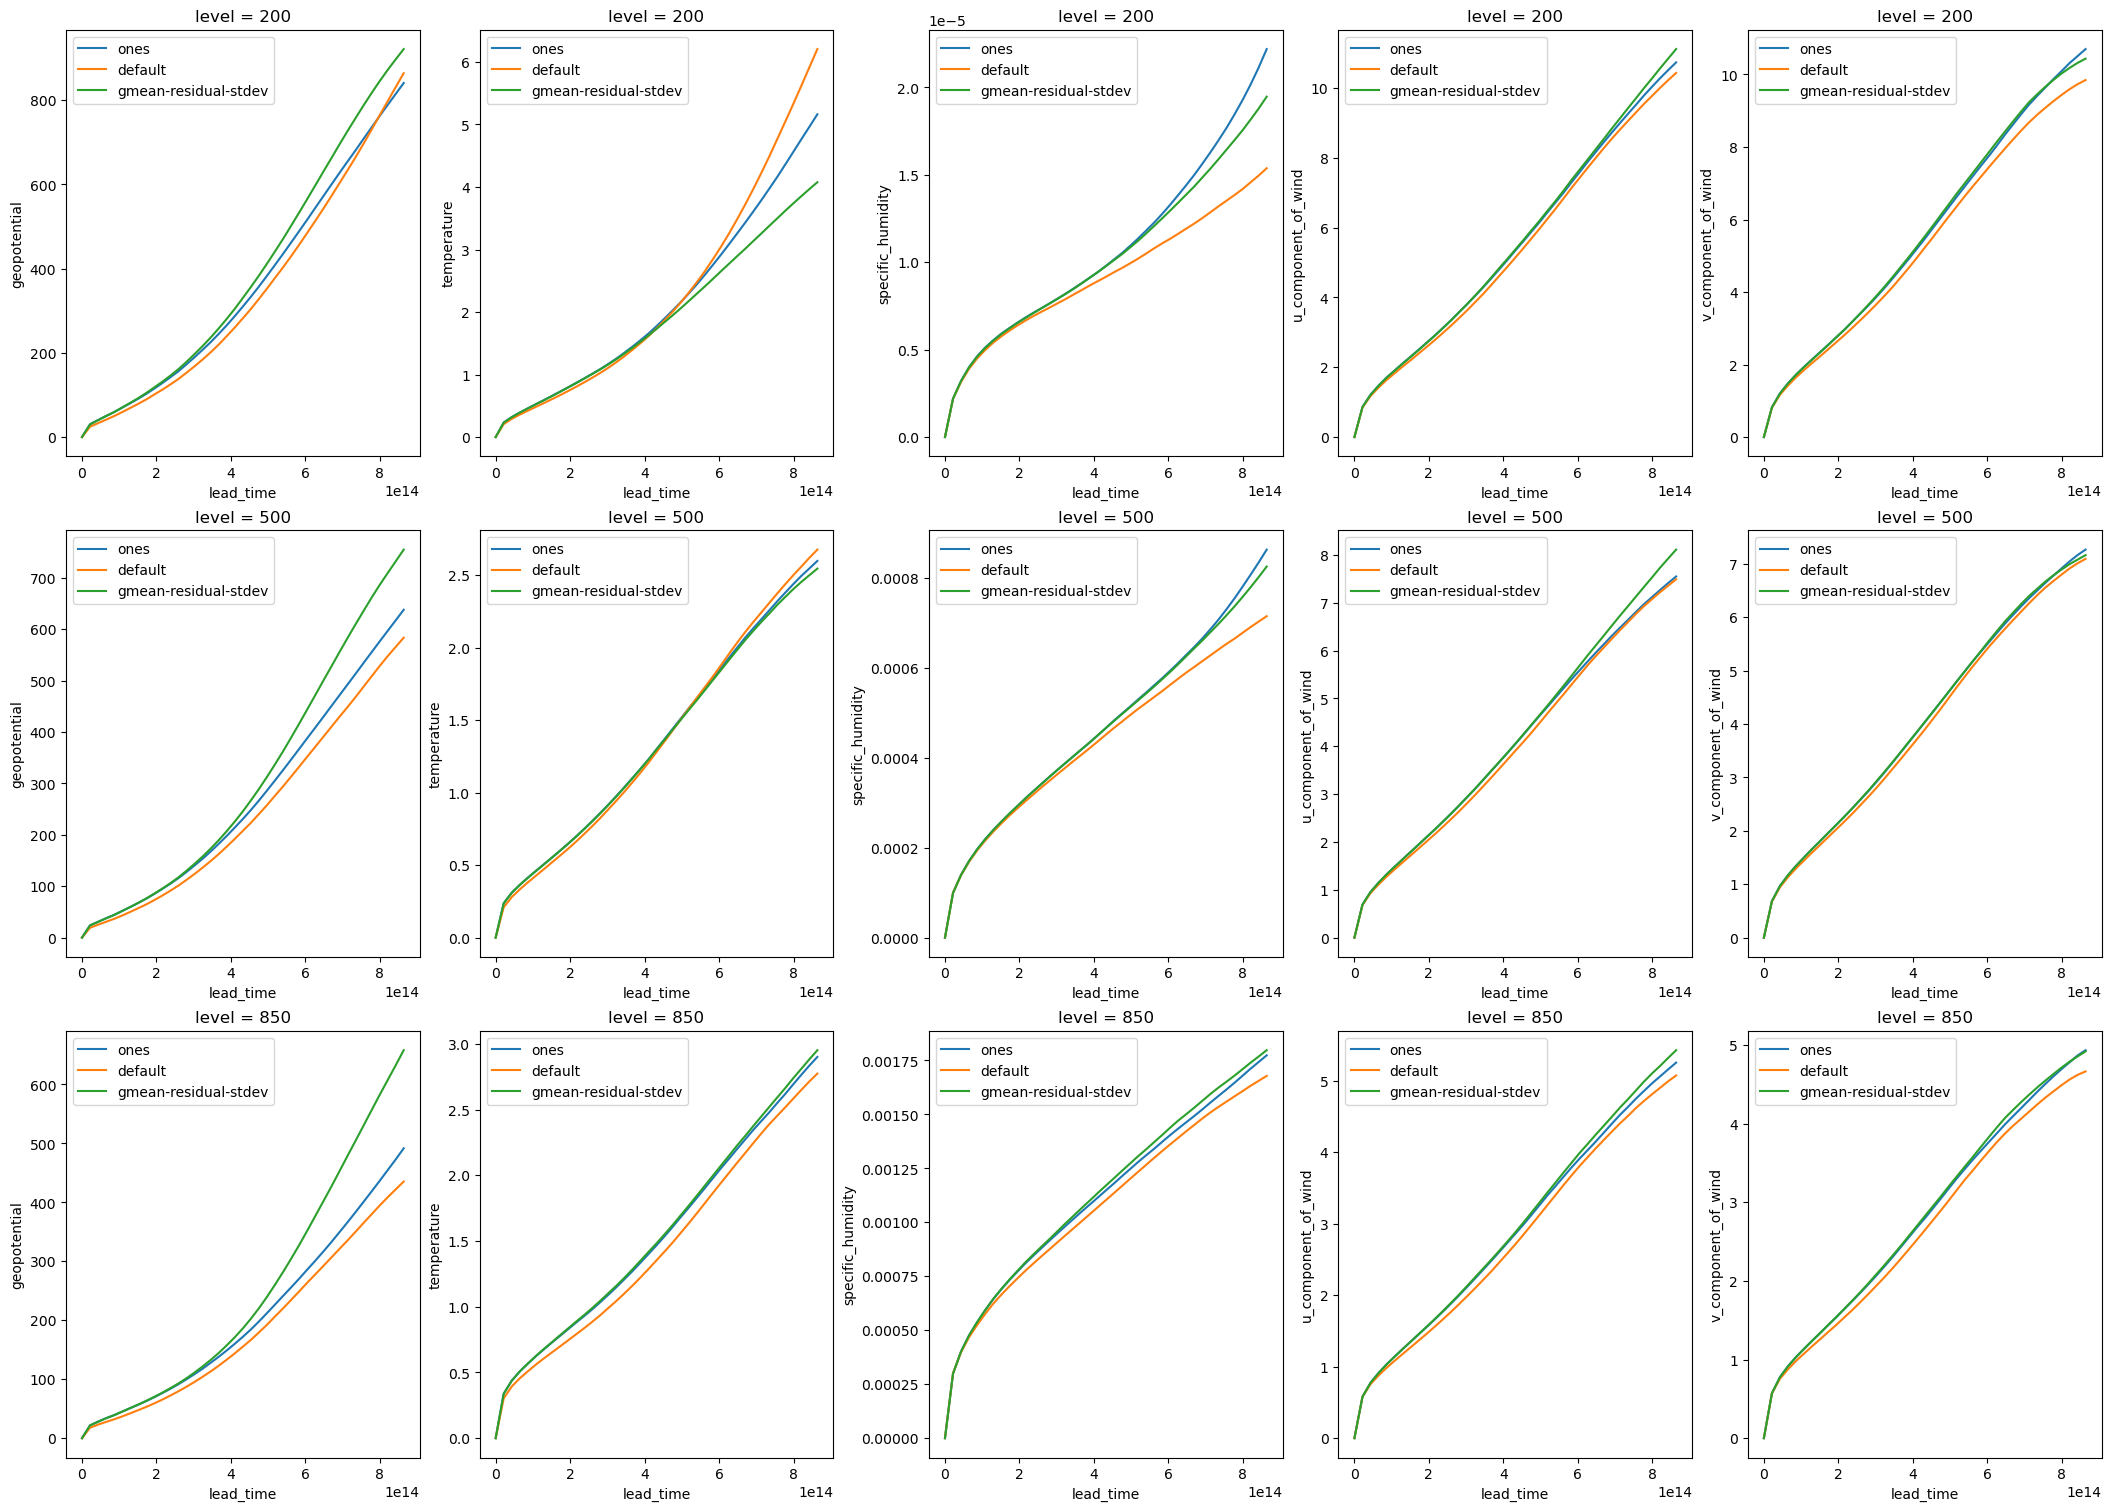

In [18]:
fig, axs = plt.subplots(3,5, figsize=(21, 15), constrained_layout=True)

for level, axr in zip(
    [200, 500, 850],
    axs,
):
    for varname, ax in zip(
        ["geopotential", "temperature", "specific_humidity", "u_component_of_wind", "v_component_of_wind"],
        axr,
    ):
        for experiment, xds in mae.items():
            xds[varname].sel(level=level).plot(ax=ax, label=experiment)
    
        ax.legend()